In [3]:
!pip install seaborn

     |████████████████████████████████| 292 kB 23.3 MB/s eta 0:00:01


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_dir= '../dataset/train/train.csv'
test_dir= '../dataset/test/test_data.csv'
train_dataset = pd.read_csv(train_dir)
test_dataset = pd.read_csv(test_dir)

In [3]:
# train 데이터셋 둘러보기
train_dataset

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [4]:
# test 데이터셋 둘러보기
test_dataset

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree
...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,"{'word': '정부', 'start_idx': 33, 'end_idx': 34,...","{'word': '이탈리아', 'start_idx': 41, 'end_idx': 4...",100,wikitree
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,"{'word': '종근당', 'start_idx': 133, 'end_idx': 1...","{'word': '전년', 'start_idx': 143, 'end_idx': 14...",100,wikitree
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...","{'word': '한국전기안전공사', 'start_idx': 0, 'end_idx'...","{'word': '조성완', 'start_idx': 12, 'end_idx': 14...",100,wikitree
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,"{'word': 'B. 슈나이더', 'start_idx': 6, 'end_idx':...","{'word': '1987년', 'start_idx': 0, 'end_idx': 4...",100,wikipedia


In [5]:
# train 좀 더 상세히
train_dataset.describe(include='all')

# 1. 완전히 중복된 문장들 존재! (sentence unique값이 28803개이고, freq값이 3이면 최대 3번이나 중복되는 문장이 있다.
# 2. 중복된 subject_entity, subject_entity값이 있다. 이들을 잘 활용하면 문장 augmentation이 가능할 듯 싶다.
# 

,id,sentence,subject_entity,object_entity,label,source
count,32470.000000,32470,32470,32470,32470,32470
unique,NaN,28803,26340,25704,30,3
top,NaN,도쿠가와 이에야스와 도쿠가와 히데타다가 20년에 걸쳐 안정시킨 막부를 이어받은 3대...,"{'word': '화순군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '구충곤', 'start_idx': 7, 'end_idx': 9, ...",no_relation,wikipedia
freq,NaN,3,98,94,9534,21620
mean,16234.500000,NaN,NaN,NaN,NaN,NaN
std,9373.425957,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN
25%,8117.250000,NaN,NaN,NaN,NaN,NaN
50%,16234.500000,NaN,NaN,NaN,NaN,NaN
75%,24351.750000,NaN,NaN,NaN,NaN,NaN


In [9]:
# test 좀 더 상세히
gen_dataset.describe(include='all')

# 완전히 중복된 문장은 딱 하나 존재한다.
# train_dataset과 동일하게 subject_entity, object_entity이 중복되는 경우도 존재한다.

,Unnamed: 0,id,sentence,subject_entity,object_entity,subject_type,object_type,label,subject_idx,object_idx
count,32996.000000,32996.000000,32996,32996,32996,32996,32996,32996,32996,32996
unique,NaN,NaN,32984,9235,7728,2,6,30,760,878
top,NaN,NaN,레오나르도 다빈치(Leonardo Da Vinci,민주당,자유한국당,PER,PER,no_relation,"[0, 2]","[0, 2]"
freq,NaN,NaN,3,136,271,17151,9897,9637,7298,5549
mean,16497.500000,16497.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9525.269078,9525.269078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8248.750000,8248.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16497.500000,16497.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,24746.250000,24746.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gen_dataset = pd.read_csv("/opt/ml/dataset/train/gen_train_concat.csv", encoding='utf-8')

In [18]:
gen_dataset['label'].value_counts()

no_relation                            18430
org:top_members/employees               8545
per:employee_of                         7048
per:title                               4083
org:member_of                           3655
org:alternate_names                     2605
per:origin                              2440
per:date_of_birth                       2386
org:place_of_headquarters               2359
per:alternate_names                     1881
per:spouse                              1575
per:parents                             1035
per:colleagues                          1014
org:founded                              915
per:date_of_death                        849
org:members                              828
org:product                              739
per:children                             606
per:place_of_residence                   385
per:other_family                         372
per:place_of_birth                       342
org:founded_by                           309
per:produc

In [16]:
vanlia_dataset = pd.read_csv("/opt/ml/dataset/train/dup_clean_train.csv",index_col=0, encoding='utf-8')
vanlia_dataset['label'].value_counts()

no_relation                            9530
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             419
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  192
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

Text(0.5, 1.0, 'gen_train_dataset: label')

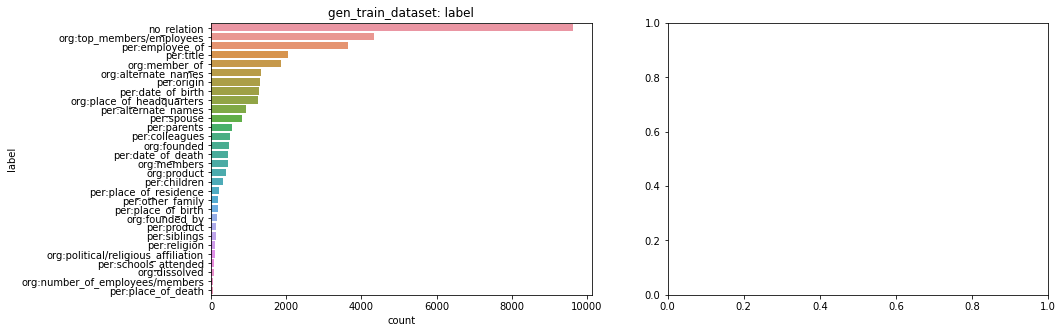

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.countplot(y=gen_dataset['label'], ax=ax[0], order = gen_dataset['label'].value_counts().index).set_title("gen_train_dataset: label")
# sns.countplot(y=gen_dataset['label'], ax=ax[1]).set_title("test_dataset: label")

< train_dataset >
 wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64
---------------------------------
< test_dataset >
 wikitree           4088
wikipedia          3621
policy_briefing      56
Name: source, dtype: int64


Text(0.5, 1.0, 'test_dataset: source')

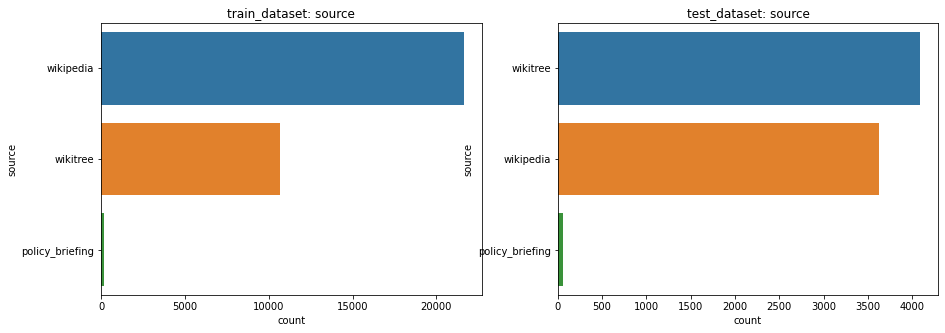

In [17]:
# source column은 뭔가 필요없어보이긴 하는데??
print("< train_dataset >\n",train_dataset['source'].value_counts())
print("---------------------------------")
print("< test_dataset >\n",test_dataset['source'].value_counts())
fig,ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=train_dataset['source'], ax=ax[0]).set_title("train_dataset: source")
sns.countplot(y=test_dataset['source'], ax=ax[1]).set_title("test_dataset: source")
# policy_briefing은 뭔가 outlier일 수도 있을 듯?

In [16]:
subject_entity_dict = train_dataset['subject_entity']
subject_entity_dict[0]

"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}"

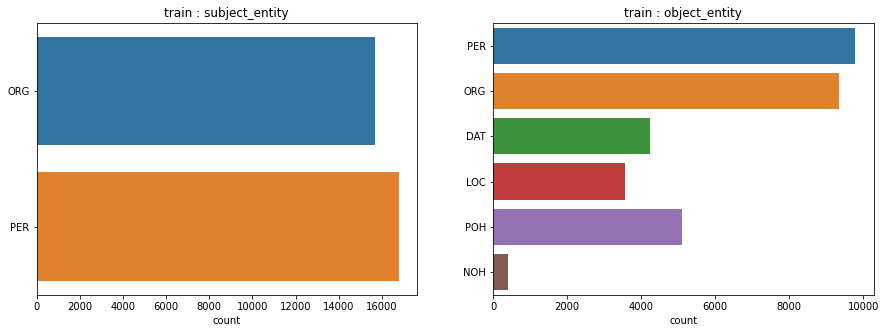

In [21]:
subject_entity_type = [eval(e)['type'] for e in train_dataset['subject_entity']]
object_entity_type= [eval(e)['type'] for e in train_dataset['object_entity']]
t_subject_entity_type = [eval(e)['type'] for e in test_dataset['subject_entity']]
t_object_entity_type= [eval(e)['type'] for e in test_dataset['object_entity']]
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.countplot(y=subject_entity_type, ax=ax[0]).set_title("train : subject_entity")
sns.countplot(y=object_entity_type, ax=ax[1]).set_title("train : object_entity");

# 그럼 subject_entity,object_entity, label 모두 같은 문장은 무한 생성해도 되겠네??

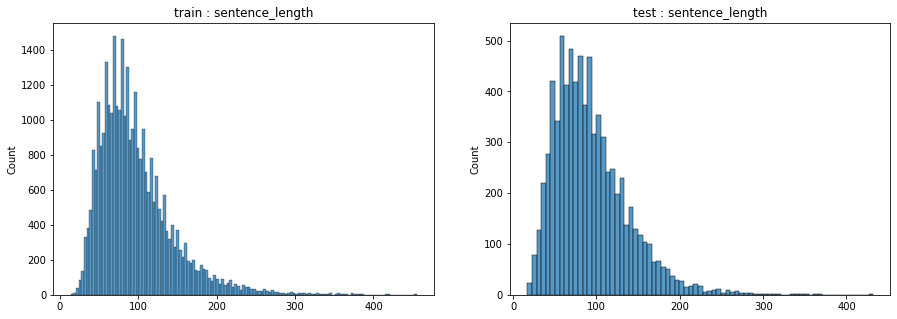

In [20]:
train_sentence_length = [len(e) for e in train_dataset['sentence']]
test_sentence_length = [len(e) for e in test_dataset['sentence']]
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_sentence_length, ax=ax[0]).set_title("train : sentence_length")
sns.histplot(test_sentence_length, ax=ax[1]).set_title("test : sentence_length");

In [30]:
print(f"< train_dataset >\nMax num : {max(train_sentence_length)}\nMin num : {min(train_sentence_length)}\nMean Num : {sum(train_sentence_length)/len(train_sentence_length)}")
print("-------------------------------------")
print(f"< test_dataset >\nMax num : {max(test_sentence_length)}\nMin num : {min(test_sentence_length)}\nMean Num : {sum(test_sentence_length)/len(test_sentence_length)}")

< train_dataset >
Max num : 455
Min num : 14
Mean Num : 97.08395441946412
-------------------------------------
< test_dataset >
Max num : 432
Min num : 17
Mean Num : 92.96497102382486


In [31]:
# 데이터 모든 열이 중복인 데이터 갯수
#pd.options.display.max_rows = 100
duplicated_input = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity','object_entity']) == True]
duplicated_all = train_dataset[train_dataset.duplicated(['sentence', 'subject_entity','object_entity', 'label']) == True]
print(len(duplicated_input))
print(len(duplicated_all))
duplicated_all

47
42


,id,sentence,subject_entity,object_entity,label,source
3547,3547,2010년 10월 15일 전라북도청을 방문한 맹형규 행정안전부 장관은 도내 지자체간...,"{'word': '전라북도청', 'start_idx': 14, 'end_idx': ...","{'word': '행정안전부', 'start_idx': 29, 'end_idx': ...",no_relation,wikipedia
7168,7168,"특히, KRI 한국기록원으로부터 2년 연속 공인중개사 최다 합격자 배출 기록을 공식...","{'word': '한국기록원', 'start_idx': 8, 'end_idx': 1...","{'word': 'KRI', 'start_idx': 4, 'end_idx': 6, ...",org:alternate_names,wikitree
8693,8693,김영삼 전 대통령은 2012년 7월 11일 김문수 새누리당 대선 경선후보의 예방에 ...,"{'word': '김문수', 'start_idx': 24, 'end_idx': 26...","{'word': '박근혜', 'start_idx': 47, 'end_idx': 49...",no_relation,wikipedia
10043,10043,특히 신분변화를 담고 있는데 1차 시도는 김영삼 정부 시절 해양수산부 장관이 각 지...,"{'word': '해운항만청', 'start_idx': 47, 'end_idx': ...","{'word': '해양수산부', 'start_idx': 33, 'end_idx': ...",org:member_of,wikipedia
10202,10202,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
10616,10616,"전현무 소속사 SM C&C는 ""'아나운서'라는 직업적 공통분모 속에서 선후배 간 좋...","{'word': '전현무', 'start_idx': 0, 'end_idx': 2, ...","{'word': 'SM C&C', 'start_idx': 8, 'end_idx': ...",per:employee_of,wikitree
14094,14094,"석가제환인다라(釋迦提桓因陀羅)에서 석가는 샤크라(Śakra)의 음역어인데, 샤크라는...","{'word': '인드라', 'start_idx': 54, 'end_idx': 56...","{'word': 'Indra', 'start_idx': 58, 'end_idx': ...",per:alternate_names,wikipedia
14658,14658,함연지는 함영준 오뚜기 회장의 장녀다.,"{'word': '오뚜기', 'start_idx': 9, 'end_idx': 11,...","{'word': '함영준', 'start_idx': 5, 'end_idx': 7, ...",org:top_members/employees,wikitree
15776,15776,그러나 곧 이은 총선에서 한나라당이 원내 1당을 차지했고 연정상대였던 자유민주연합은...,"{'word': '자유민주연합', 'start_idx': 39, 'end_idx':...","{'word': '한나라당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikipedia
18171,18171,"지난 5월, CY그룹(전국 최대규모 롯데백화점․롯데마트 등 롯데그룹 유통매장 보유)...","{'word': '롯데백화점', 'start_idx': 20, 'end_idx': ...","{'word': '롯데그룹', 'start_idx': 33, 'end_idx': 3...",org:member_of,wikitree


In [32]:
# 데이터는 같지만 label이 다른 경우의수
duplicated_input[~duplicated_input['id'].isin(duplicated_all['id'])]

,id,sentence,subject_entity,object_entity,label,source
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
22258,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree
32299,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree


In [33]:
subj_word = [eval(e)['word'] for e in train_dataset['subject_entity']]
# 자주 출현하는 단어로 Vocab에 추가해보는것을 어떨지
pd_subj_word = pd.Series(subj_word).value_counts()
pd_subj_word[0:100]

민주당           144
화순군           107
고흥군            99
광주광역시          92
더불어민주당         92
             ... 
프로이센           27
K리그            26
아틀레티코 마드리드     26
순천시            26
비틀즈            26
Length: 100, dtype: int64

In [ ]:
# 중복된 문장은 다 제거해주어서 데이터셋 정렬
# 데이터셋에서 augmentation으로 추가해주자

In [35]:
from load_data import *
train_dataset = load_data("../dataset/train/train.csv")
raw_dataset = pd.read_csv("../dataset/train/train.csv")
print(len(train_dataset))
train_dataset.drop_duplicates(subset=['sentence','subject_entity','object_entity'], inplace= True)
print(len(train_dataset))

32470
32417


In [36]:
# 확인사살
train_dataset[train_dataset[['sentence','subject_entity','object_entity']].duplicated(keep=False)].sort_values('sentence')

,id,sentence,subject_entity,object_entity,label
